In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.optimizers import SGD


Using TensorFlow backend.


In [4]:
from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
plt.style.use("ggplot")
%matplotlib inline
import tensorflow as tf
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [65]:


main_folder = "C:/Users/rajar/Desktop/btech/face/"
images_folder = main_folder + "img_align_celeba/"

example_pic = images_folder + "000506.jpg"

training_sample = 10000
validation_sample = 2000
test_sample = 2000
img_width = 178
img_height = 218
batch_size = 16
num_epochs = 5

df_attr = pd.read_csv(main_folder + 'list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True)

In [6]:
df_attr.head(5)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [11]:


df_attr.describe()



,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,0.111136,0.266981,0.512505,0.204572,0.022443,0.151575,0.240796,0.234532,0.239251,0.147992,...,0.056511,0.48208,0.208402,0.319567,0.188925,0.048460,0.472436,0.122967,0.072715,0.773617
std,0.314301,0.442383,0.499845,0.403389,0.148121,0.358610,0.427568,0.423707,0.426627,0.355093,...,0.230906,0.49968,0.406167,0.466310,0.391450,0.214737,0.499241,0.328400,0.259669,0.418491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:


alls=df_attr.columns



In [9]:


df_attr.isnull().sum()



5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0
Wearing_Necktie        0
Young                  0


In [10]:


df_attr.shape

# List of available attributes
for i, j in enumerate(df_attr.columns):
    print(i, j)

0 5_o_Clock_Shadow
1 Arched_Eyebrows
2 Attractive
3 Bags_Under_Eyes
4 Bald
5 Bangs
6 Big_Lips
7 Big_Nose
8 Black_Hair
9 Blond_Hair
10 Blurry
11 Brown_Hair
12 Bushy_Eyebrows
13 Chubby
14 Double_Chin
15 Eyeglasses
16 Goatee
17 Gray_Hair
18 Heavy_Makeup
19 High_Cheekbones
20 Male
21 Mouth_Slightly_Open
22 Mustache
23 Narrow_Eyes
24 No_Beard
25 Oval_Face
26 Pale_Skin
27 Pointy_Nose
28 Receding_Hairline
29 Rosy_Cheeks
30 Sideburns
31 Smiling
32 Straight_Hair
33 Wavy_Hair
34 Wearing_Earrings
35 Wearing_Hat
36 Wearing_Lipstick
37 Wearing_Necklace
38 Wearing_Necktie
39 Young


Smiling    1
Male       0
Young      1
Name: 000506.jpg, dtype: int64

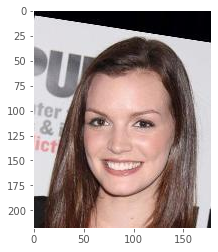

In [12]:


# load a example image

img = load_img(example_pic)
plt.grid(False)
plt.imshow(img)
df_attr.loc[example_pic.split('/')[-1]][['Smiling','Male',"Young"]]



In [13]:
df_partition = pd.read_csv(main_folder + "list_eval_partition.csv")
df_partition.head(5)

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [14]:
df_partition.sample(100)

,image_id,partition
167474,167475.jpg,1
36073,036074.jpg,0
147031,147032.jpg,0
147885,147886.jpg,0
148357,148358.jpg,0
...,...,...
170960,170961.jpg,1
113676,113677.jpg,0
93294,093295.jpg,0
68996,068997.jpg,0


In [15]:


df_partition["partition"].value_counts().sort_index()



0    162770
1     19867
2     19962
Name: partition, dtype: int64

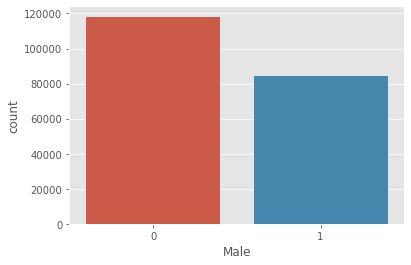

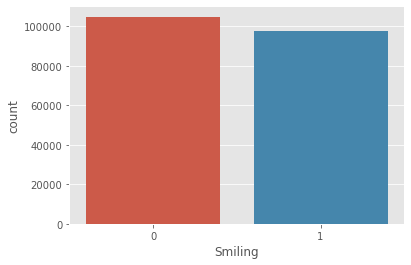

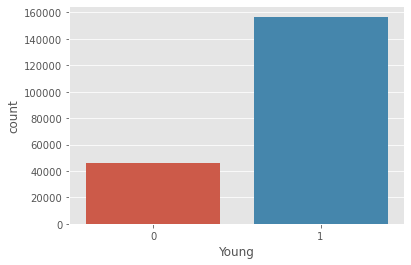

In [16]:
sns.countplot(df_attr["Male"])
plt.show()
sns.countplot(df_attr["Smiling"])
plt.show()
sns.countplot(df_attr["Young"])
plt.show()

In [17]:


df_partition.set_index('image_id', inplace=True)

In [18]:
for all in alls:
    df_partition=df_partition.join(df_attr[all], how="inner")
df_par_attr=df_partition

In [19]:

df_par_attr.head(5)

,partition,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [20]:
df_par_attr.shape

(202599, 41)

In [66]:
def load_reshape_img(fname):
    img = load_img(fname)
    x = img_to_array(img)/255.
    x = x.reshape((1,)+x.shape)
    return x

In [67]:
def generate_df(partition, attr, num_samples):
    
    df_ = df_par_attr[(df_par_attr['partition'] == partition) 
                           & (df_par_attr[attr] == 0)].sample(int(num_samples/2))
    df_ = pd.concat([df_,
                      df_par_attr[(df_par_attr['partition'] == partition) 
                                  & (df_par_attr[attr] == 1)].sample(int(num_samples/2))])


    if partition != 2:
        x_ = np.array([load_reshape_img(images_folder + fname) for fname in df_.index])
        x_ = x_.reshape(x_.shape[0], 218, 178, 3)
        y_ = np_utils.to_categorical(df_[attr],2)

    else:
        x_ = []
        y_ = []

        for index, target in df_.iterrows():
            im = cv2.imread(images_folder + index)
            im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (img_width, img_height)).astype(np.float32) / 255.0
            im = np.expand_dims(im, axis =0)
            x_.append(im)
            y_.append(target[attr])

    return x_, y_

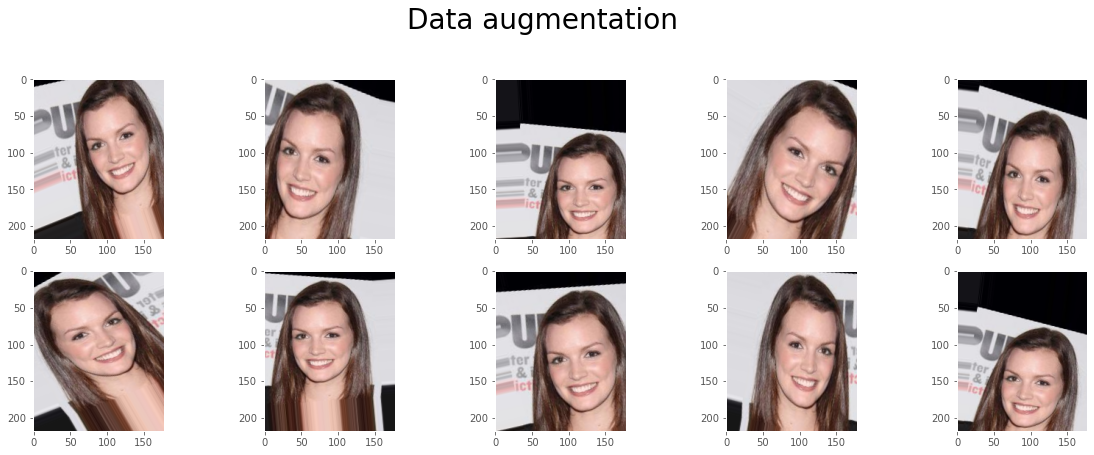

In [68]:
# generate image generator for data augmentation

datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# load one image and reshape

img = load_img(example_pic)
x = img_to_array(img)/255.
x = x.reshape((1,) + x.shape)

# plot 10 augmented images of the loaded image

plt.figure(figsize=(20,10))
plt.suptitle("Data augmentation", fontsize=28)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3,5,i+1)
    plt.grid(False)
    plt.imshow(batch.reshape(218,178, 3))
    
    if i==9:
        break
    i = i+1
    
plt.show()

In [34]:

    
x_train, y_train = generate_df(0, "Male", training_sample)
x_valid, y_valid = generate_df(1, "Male", validation_sample)

In [46]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(218,178,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output=output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of a268eb855778b3df3c7506639542a6af so we will re-download the data.
94658560/94653016 [==============================] - 970s 10us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 218, 178, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 224, 184, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 109, 89, 64)  9472        conv1_pad[0][0]                  
___________________________

In [53]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(restnet)
model.add(Dense(512, activation='relu', input_dim=(218,178,3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 86016)             23587712  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               44040704  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1026      
Total params: 67,892,098
Trainable params: 44,304,386
Non-trainable params: 23,587,712
_________________________________

In [29]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_datagen.fit(x_train)

train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)

In [69]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=training_sample/batch_size, 
                              epochs=5,
                              validation_data=(x_valid, y_valid), 
                              verbose=1)

Epoch 1/5
625/625 [==============================] - 2087s 3s/step - loss: 0.4719 - accuracy: 0.7941 - val_loss: 3.0323 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 2066s 3s/step - loss: 0.4602 - accuracy: 0.8011 - val_loss: 2.6133 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 2103s 3s/step - loss: 0.4505 - accuracy: 0.8025 - val_loss: 2.7584 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 2056s 3s/step - loss: 0.4430 - accuracy: 0.8091 - val_loss: 3.0680 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 2055s 3s/step - loss: 0.4389 - accuracy: 0.8176 - val_loss: 3.9756 - val_accuracy: 0.5000


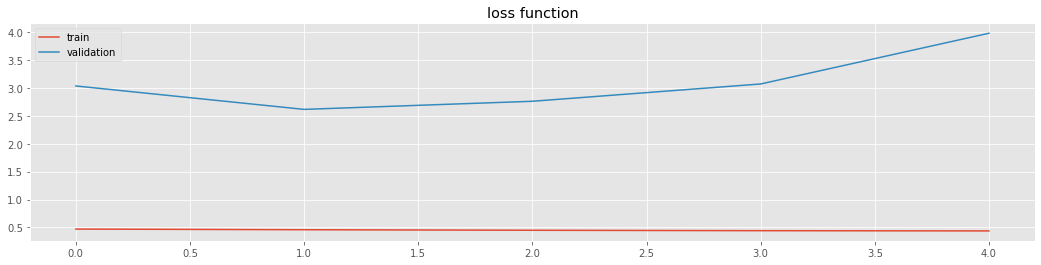

In [70]:

plt.figure(figsize=(18,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('loss function')
plt.show()

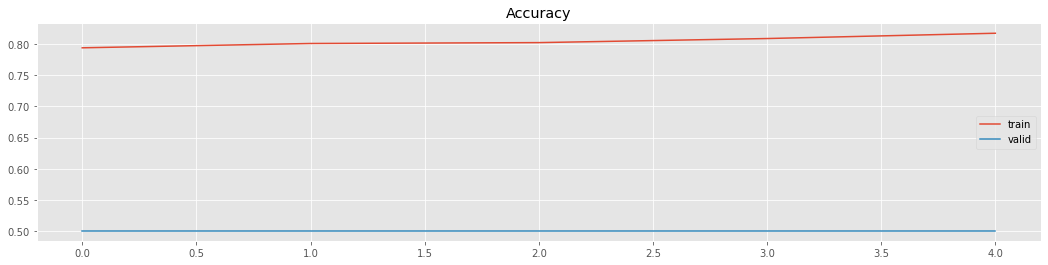

In [73]:
# Plot accuracy through epochs
plt.figure(figsize=(18, 4))
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.title('Accuracy')
plt.show()

In [74]:
# test data

x_test, y_test = generate_df(2, 'Male', test_sample)

# generate predictions

model_prediction = [np.argmax(model.predict(feature)) for feature in x_test]

# report test accuracy

test_accuracy = 100 * (np.sum(np.array(model_prediction)==y_test)/len(model_prediction))
print('model evaluation')
print("test accuracy : ", test_accuracy)
print('f1 score : ', f1_score(y_test, model_prediction))

model evaluation
test accuracy :  50.0
f1 score :  0.6666666666666666
